# Problématique

<h3> Prédire le nombre de lettres dans l'image (régression)</h3>

- Sample de 1000 observations (1000 mots) : charger (function preprocess (utiliser en sortie un .numpy() pour avoir des arrays), container toutes observations pour faire une matrice de taille (nb_observation, nb_features).
- Modèle Deep learning : MLP
- Évaluation du modèle : MAE métrique


# Chargement du dataframe

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

full_df = pd.read_pickle('../pickle/df.pickle')
full_df.head()

,index,word_id,gray_level,x,y,w,h,tag,transcription,word_img_path,...,form_id,writer_id,text_id,number_of_sentences,word_seg,total_lines,correct_lines,total_words,correct_words,form_img_path_y
0,0,a01-000u-00-00,154,408,768,27,51,AT,A,../data/words/a01/a01-000u/a01-000u-00-00.png,...,a01-000u,000,a01,2,prt,7,5,52,36,../data/formsA-D/a01-000u.png
1,1,a01-000u-00-01,154,507,766,213,48,NN,MOVE,../data/words/a01/a01-000u/a01-000u-00-01.png,...,a01-000u,000,a01,2,prt,7,5,52,36,../data/formsA-D/a01-000u.png
2,2,a01-000u-00-02,154,796,764,70,50,TO,to,../data/words/a01/a01-000u/a01-000u-00-02.png,...,a01-000u,000,a01,2,prt,7,5,52,36,../data/formsA-D/a01-000u.png
3,3,a01-000u-00-03,154,919,757,166,78,VB,stop,../data/words/a01/a01-000u/a01-000u-00-03.png,...,a01-000u,000,a01,2,prt,7,5,52,36,../data/formsA-D/a01-000u.png
4,4,a01-000u-00-04,154,1185,754,126,61,NPT,Mr.,../data/words/a01/a01-000u/a01-000u-00-04.png,...,a01-000u,000,a01,2,prt,7,5,52,36,../data/formsA-D/a01-000u.png


In [100]:
import re
r = r'[a-zA-Z]+' # Only interested in letters, not punctation or decimal for the moment
print(len(full_df))
df = full_df[full_df['transcription'].str.contains(r)]
print(len(df))

96420
84515


In [101]:
df['length'] = df['transcription'].apply(lambda x: len(x.strip()))
df.rename(columns = {'form_img_path_y': 'form_img_path'}, inplace = True)
df = df[['michelson_contrast', 'gray_level_mot', 'word_id', 'gray_level', 'x', 'y', 'w', 'h', 'transcription', 'word_img_path', 'form_img_path', 'length']]

/var/folders/45/1rh915g935nggkhvq3fhbn180000gn/T/ipykernel_65199/555017374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['transcription'].apply(lambda x: len(x.strip()))
/var/folders/45/1rh915g935nggkhvq3fhbn180000gn/T/ipykernel_65199/555017374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'form_img_path_y': 'form_img_path'}, inplace = True)


In [102]:
np.random.seed(seed=42)

df.reset_index(inplace=True)
df = df.iloc[np.random.choice(df.index, 1000)]
df.head()

,index,michelson_contrast,gray_level_mot,word_id,gray_level,x,y,w,h,transcription,word_img_path,form_img_path,length
15795,17751,0.545455,0.861152,b05-062-03-03,186,651,1276,49,42,I,../data/words/b05/b05-062/b05-062-03-03.png,../data/formsA-D/b05-062.png,1
860,959,0.695946,0.792244,a01-020u-09-00,168,351,2384,298,57,House,../data/words/a01/a01-020u/a01-020u-09-00.png,../data/formsA-D/a01-020u.png,5
76820,87368,0.808511,0.841742,n04-183-01-04,155,1124,953,76,65,in,../data/words/n04/n04-183/n04-183-01-04.png,../data/formsI-Z/n04-183.png,2
54886,62086,0.752577,0.849670,h01-010-01-00,158,347,911,50,57,in,../data/words/h01/h01-010/h01-010-01-00.png,../data/formsE-H/h01-010.png,2
6265,7026,0.764706,0.892063,a03-059-00-00,175,517,726,471,101,Sentence,../data/words/a03/a03-059/a03-059-00-00.png,../data/formsA-D/a03-059.png,8


##

In [103]:
df.set_index('word_id', inplace=True)

In [104]:
df.head()

,index,michelson_contrast,gray_level_mot,gray_level,x,y,w,h,transcription,word_img_path,form_img_path,length
word_id,,,,,,,,,,,,
b05-062-03-03,17751,0.545455,0.861152,186,651,1276,49,42,I,../data/words/b05/b05-062/b05-062-03-03.png,../data/formsA-D/b05-062.png,1
a01-020u-09-00,959,0.695946,0.792244,168,351,2384,298,57,House,../data/words/a01/a01-020u/a01-020u-09-00.png,../data/formsA-D/a01-020u.png,5
n04-183-01-04,87368,0.808511,0.841742,155,1124,953,76,65,in,../data/words/n04/n04-183/n04-183-01-04.png,../data/formsI-Z/n04-183.png,2
h01-010-01-00,62086,0.752577,0.849670,158,347,911,50,57,in,../data/words/h01/h01-010/h01-010-01-00.png,../data/formsE-H/h01-010.png,2
a03-059-00-00,7026,0.764706,0.892063,175,517,726,471,101,Sentence,../data/words/a03/a03-059/a03-059-00-00.png,../data/formsA-D/a03-059.png,8


# Image preprocessing

Pour travailler avec les images et comparer le ratio hauteur/largeur, il faut au préalable rescale nos images.

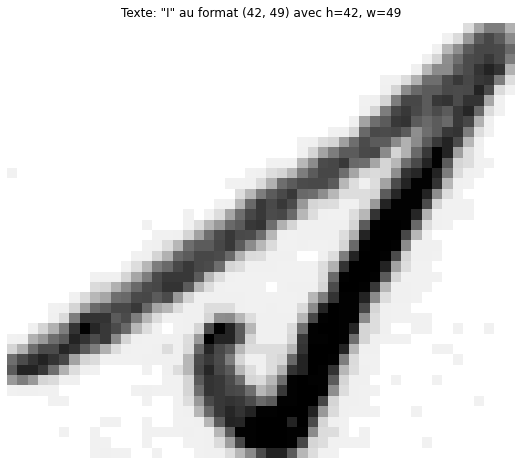

In [105]:
selected_row = df.iloc[0]

img = plt.imread(selected_row.word_img_path)
plt.figure(figsize = (10,8))
plt.title("Texte: \"{}\" au format {} avec h={}, w={}".format(selected_row.transcription, img.shape, selected_row.h, selected_row.w));
plt.axis('off')
plt.imshow(img, cmap='gray');




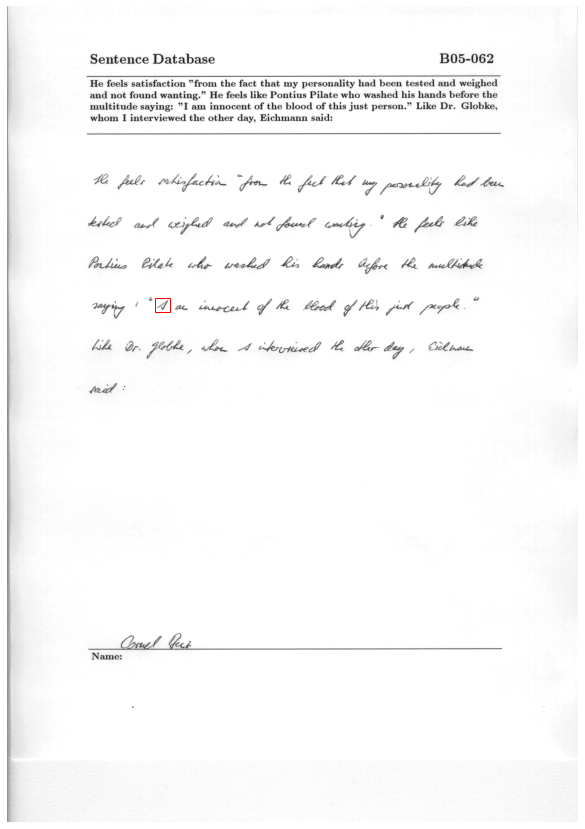

In [119]:

import matplotlib.patches as patches

line = selected_row

img = plt.imread(line.form_img_path)
fig, ax = plt.subplots(figsize=(20,15))
fig.figsize=(20,10)
ax.imshow(img, cmap='gray')
ax.add_patch(
patches.Rectangle(
    (line.x-8, line.y-8),
    line.w+16,
    line.h+16,
    fill=False,
    color = 'red'      
) ) 
plt.axis('off')
plt.show()

In [107]:
df[['w', 'h']].describe()

,w,h
count,1000.000000,1000.000000
mean,178.302000,75.609000
std,104.553451,28.813579
min,17.000000,20.000000
25%,101.000000,55.000000
50%,158.000000,72.000000
75%,236.000000,91.000000
max,625.000000,208.000000


In [108]:
df.sort_values(by=['w']).iloc[:20]

,index,michelson_contrast,gray_level_mot,gray_level,x,y,w,h,transcription,word_img_path,form_img_path,length
word_id,,,,,,,,,,,,
r03-065-00-14,94252,0.436620,0.756813,199,1925,745,17,42,I,../data/words/r03/r03-065/r03-065-00-14.png,../data/formsI-Z/r03-065.png,1
g04-014-04-02,47270,0.731449,0.667935,159,639,1649,27,30,a,../data/words/g04/g04-014/g04-014-04-02.png,../data/formsE-H/g04-014.png,1
b04-026-00-07,15499,0.764706,0.700258,162,1553,749,29,66,to,../data/words/b04/b04-026/b04-026-00-07.png,../data/formsA-D/b04-026.png,2
c06-005-08-03,26993,0.740614,0.715967,182,943,2165,29,47,a,../data/words/c06/c06-005/c06-005-08-03.png,../data/formsA-D/c06-005.png,1
d06-050-04-08,31943,0.539877,0.782785,186,1932,1466,32,42,a,../data/words/d06/d06-050/d06-050-04-08.png,../data/formsA-D/d06-050.png,1
l04-179-06-03,76662,0.645902,0.730718,173,892,1832,32,35,a,../data/words/l04/l04-179/l04-179-06-03.png,../data/formsI-Z/l04-179.png,1
a04-019-02-06,7807,0.764706,0.715803,172,1378,1288,32,44,a,../data/words/a04/a04-019/a04-019-02-06.png,../data/formsA-D/a04-019.png,1
d05-013-03-05,30798,0.764706,0.843342,172,990,1422,33,127,of,../data/words/d05/d05-013/d05-013-03-05.png,../data/formsA-D/d05-013.png,2
g06-011j-06-08,49778,0.761404,0.763571,182,1647,1793,33,62,a,../data/words/g06/g06-011j/g06-011j-06-08.png,../data/formsE-H/g06-011j.png,1


# Simplest model

Hypothèse: le nombre de caractère est proportionnel à la largeur des boîtes.

In [109]:
df1 = df

In [110]:
def get_ratio_height_width(row):
    return row.h / row.w

df1['ratio_h_w'] = get_ratio_height_width(df1)

/Users/jpec/opt/anaconda3/envs/ds/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


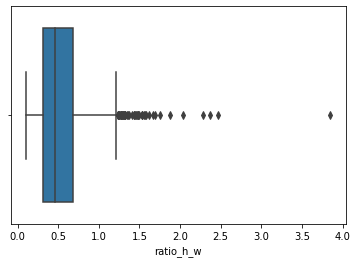

In [111]:
import seaborn as sns

sns.boxplot('ratio_h_w', data = df1);
# 

In [112]:
df1['ratio_h_w'].describe()

count    1000.000000
mean        0.548737
std         0.339213
min         0.102400
25%         0.314970
50%         0.455435
75%         0.680576
max         3.848485
Name: ratio_h_w, dtype: float64